# Demo: Sampling with LoRA in Diffusion Models

Sample with vanilla Stable Diffusion.


100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


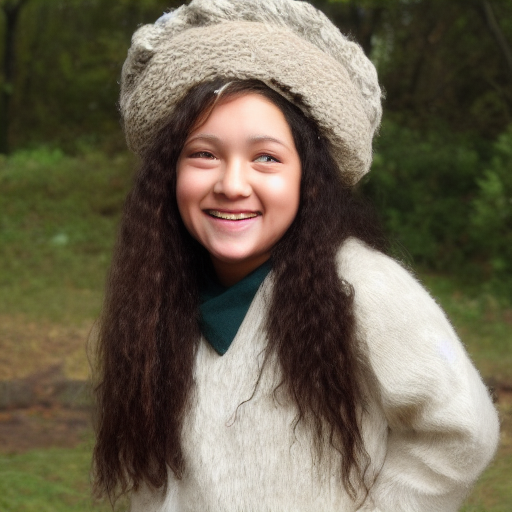

In [2]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler, StableDiffusionImg2ImgPipeline
import torch
import sys
import time
sys.path.insert(0, sys.path[0]+"/../")


model_id = "../stable-diffusion/stable-diffusion-1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of a sks person"
torch.manual_seed(time.time())
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice. diffusers are cool.


Sample with LoRA in Stable Diffusion

100%|██████████| 50/50 [00:05<00:00,  9.47it/s]


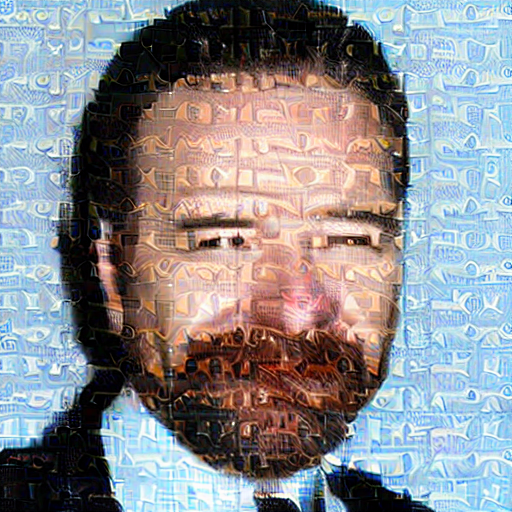

In [8]:
from lora_diffusion import tune_lora_scale, patch_pipe
torch.manual_seed(time.time())

patch_pipe(
    pipe,
    "../output/lora/sd1-5_adv/lora_weight.safetensors",
    patch_text=True,
    patch_ti=False,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.00)
tune_lora_scale(pipe.text_encoder, 1.00)
prompt = 'a photo of a sks person'
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
image.save("../output/lora_output_example.jpg")
image
